# Building a CNN Model for The MNIST Dataset
###### By: Rutwik V Jangam
- The MNIST dataset is a handwritten digit dataset. We will now proceed to build a CNN Model that recognises the handwritten digits and classifies them into one on the 10 digits starting from 0 to 9.

## Importing Libraries and the Dataset
- We now import all the required libraries and import the MNIST dataset which is present in the Keras Package itself.

In [1]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
import numpy as np

- We know load the dataset into train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- We check for the shape of the train and test data for our verification.

In [3]:
print("train data")
print(x_train.shape)
print(y_train.shape)
print("\n test data")
print(x_test.shape)
print(y_test.shape)

train data
(60000, 28, 28)
(60000,)

 test data
(10000, 28, 28)
(10000,)


- We have 60,000 training and 10,000 test images each of size 28 x 28. These images are grayscale and hence stored as 2 dimensional arrays.
- Let us now check for a sample image from the x_train dataset and also check the coressponding label in y_train.

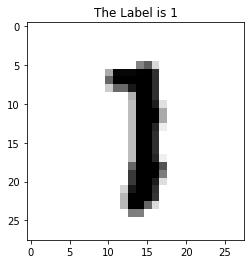

In [4]:
index  = 3456
k = x_train[index,:]
k = k.reshape((28, 28))
plt.title('The Label is {label}'.format(label= y_train[index]))
plt.imshow(k, cmap='binary')

- We can see that the image appears to be 1 and the corresponding label confirms the same as well.

## Data Preparation
- We now proceed to prepare the data for feeding the network.
- The three main steps involved in this preperation are: <br>
<tab>1. Reshaping the Data<br>
<tab>2. Rescaling the Data<br>
<tab>3. Converting the Input Data from int to float
<br>
<br>
- We first specify few variables such as image size(rows and columns) and also the batch size, number of classes to be classified and the epochs

In [5]:
# specify input dimensions of each image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# batch size, number of classes, epochs
batch_size = 128
num_classes = 10
epochs = 12

###### Reshaping the Data
- We will need to reshape the input data as we would want them to have a single colour channel since the images are grayscale.
- This is applicable for the x_train and x_test datasets.

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


- Similarly the y_trains and y_test data needs to converted from class lables into one-hot encoded vectors

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(60000, 10)


###### Rescaling and Converting the Input Data from int to float
- We first convert the data from int to float since it is advisable to use float in Neural Networks.
- We then normalise and rescale the pixel value by dividing the value by 255 so that the range becomes 0 to 1.

In [8]:
# convert int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalise
x_train /= 255
x_test /= 255

## Developing a Baseline Model
We first go ahead to build a simple shallow model to predict handwritten images.<br>
We instantiate a Sequential model and keep adding layers.<br>
<br>
The Baseline model will consist of:
- One Convolutional layer having 32 filters with a filter size of (3,3)
- followed by a maxpooling layer
- and then flatten the output of the pooling layer to give us a long vector
- We then add a fully connected dense layer with 128 neurons
- The last layer is the softmax layer with 10 neurons

All the layers other than the last layer will be using the ReLU activation function. <br>
We would also use a dropout layer to regularize our model and stop it from overfitting.

In [9]:
# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flattening and a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

- The above model summary tells us about the the total number of parameters are that are to be trained and also the output dimensions after each layer.
- The none in the output shape represents the batch size.

### Fitting and evaluating the baseline model
- We now proceed to compile the model. The loss function to be optimised is the cross entropy loss.
- The optimizer which we will be using is the Stochastic Gradient Descent with a learning rate of 0.01 and a momentum of 0.9. he momentum would help in accelerating the gradient in the right direction.
- The metric which we would use to evaluate is Accuracy.

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              metrics=['accuracy'])

- We proceed to fit the model using the x_train and y_train.
- Although we can use Kfold cross validation to evaluate the performance of our model, we would only be using the 'validation_data' argument supported by Keras due to computational and time constraints.
- The validation_data argument would return the performance metric of the model(in our case accuracy) on each training epoch iteratively on batches of data (batches sized 128).

In [11]:
 model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 13s 26ms/step - loss: 0.5559 - accuracy: 0.8243 - val_loss: 0.2014 - val_accuracy: 0.9415
Epoch 2/12
469/469 [==============================] - 12s 25ms/step - loss: 0.2877 - accuracy: 0.9127 - val_loss: 0.1495 - val_accuracy: 0.9541
Epoch 3/12
469/469 [==============================] - 12s 25ms/step - loss: 0.2276 - accuracy: 0.9314 - val_loss: 0.1129 - val_accuracy: 0.9650
Epoch 4/12
469/469 [==============================] - 12s 26ms/step - loss: 0.1890 - accuracy: 0.9437 - val_loss: 0.0931 - val_accuracy: 0.9708
Epoch 5/12
469/469 [==============================] - 12s 26ms/step - loss: 0.1580 - accuracy: 0.9526 - val_loss: 0.0783 - val_accuracy: 0.9738
Epoch 6/12
469/469 [==============================] - 12s 25ms/step - loss: 0.1387 - accuracy: 0.9587 - val_loss: 0.0749 - val_accuracy: 0.9774
Epoch 7/12
469/469 [==============================] - 12s 25ms/step - loss: 0.1217 - accuracy: 0.9642 - val_loss: 0.0615 - val_accuracy:

- We can see that the baseline model returns good train and validation accuracies.

###### We now evaluate the baseline model on test data

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9842


[0.04805685207247734, 0.9842000007629395]

- The final loss (on test data) is about 0.04 and the accuracy is 98%.

## Developing a Improved Model
We now go ahead and build an improved model to predict handwritten images with even higher accuracy.
<br>
We introduce another Convolution Layer and Batch Normalization in the improved model. The Batch Normalization standardizes the inputs to the network and accelerates training.<br><br>
In addition to the layers of the Baseline model, the improved model will consist of:
- One Batch normalization layer after the first convolution layer
- A second Convolution layer with 64 filters with a filter size of (3,3)
- Batch normalization layer after the second convolution layer
- Batch normalization layer after a fully connected dense layer with 128 neurons

Note that we would not be using the dropout layer since we would be using the Batch Normalisation which provides the regularization effect. Including both can induce noise.<br>
All the layers other than the last layer will be using the ReLU activation function.

In [13]:
# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
#model.add(Dropout(0.5))
model.add(BatchNormalization())
# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                      

- The above model summary tells us about the the total number of parameters are that are to be trained and also the output dimensions after each layer.
- The none in the output shape represents the batch size.

### Fitting and evaluating the improved model
- We now proceed to compile the model. The loss function to be optimised is the cross entropy loss.
- The optimizer which wee will be using is the Stochastic Gradient Descent with a learning rate of 0.01 and a momentum of 0.9. he momentum wouldhelp in acceleratingthe gradient in the right direction.
- The metric which we would use to evaluate is Accuracy.

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              metrics=['accuracy'])

- We proceed to fit the improved model using the x_train and y_train.
- Although we can use Kfold cross validation to evaluate the performance of our model, we would only be using the 'validation_data' argument supported by Keras due to computational and time constraints.
- The validation_data argument would return the performance metric of the model(in our case accuracy) on each training epoch.

In [15]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 56s 118ms/step - loss: 0.1071 - accuracy: 0.9689 - val_loss: 0.5225 - val_accuracy: 0.8387
Epoch 2/12
469/469 [==============================] - 55s 117ms/step - loss: 0.0350 - accuracy: 0.9903 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 3/12
469/469 [==============================] - 55s 117ms/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 4/12
469/469 [==============================] - 55s 117ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 5/12
469/469 [==============================] - 55s 116ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.0294 - val_accuracy: 0.9899
Epoch 6/12
469/469 [==============================] - 55s 116ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 7/12
469/469 [==============================] - 56s 120ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.0267 - val_ac

- We can see that the model does exceptionally well on the train data with an accuracy of 100%. The validation accuracy is 99% as well.

###### We now evaluate the improved model on test data

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0250 - accuracy: 0.9919


[0.0249941349029541, 0.9919000267982483]

- The final loss (on test data) is about 0.02 and the accuracy is greater than 99%.

## Saving the Finalized Model and making Predictions
- We now save our model to an H5 file in our local directory

In [17]:
model.save('final.h5')

### Loading the Saved Model and Evaluation
- To make predictions we load the saved model using load_model

In [18]:
loaded_model = load_model('final.h5')

- We now test the model on the complete MNIST data instead of dividing it into test and train sets to get an idea of how the model performs.
- We will need to concatenate the test and train datasets since load_data give 4 outputs

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

- We check for the shape of the x and y data for our verification.

In [20]:
print("\n test data")
print(x.shape)
print(y.shape)


 test data
(70000, 28, 28)
(70000,)


- We re-define variables such as image size(rows and columns) and also the batch size, number of classes to be classified and the epochs

In [21]:
# specify input dimensions of each image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# batch size, number of classes, epochs
batch_size = 128
num_classes = 10
epochs = 12

- We now proceed to prepare the data for feeding the network.
- The three main steps involved in this preperation are: <br>
<tab>1. Reshaping the Data<br>
<tab>2. Rescaling the Data<br>
<tab>3. Converting the Input Data from int to float

In [22]:
# reshape x and y
x = x.reshape(x.shape[0], img_rows, img_cols, 1)
y = keras.utils.to_categorical(y, num_classes)
print(x.shape)
print(y.shape)

(70000, 28, 28, 1)
(70000, 10)


In [23]:
# convert int to float
x = x.astype('float32')

# normalise
x /= 255

###### We now evaluate the loaded model on the complete

In [24]:
loaded_model.evaluate(x, y)

2188/2188 [==============================] - 20s 9ms/step - loss: 0.0041 - accuracy: 0.9988


[0.004085768014192581, 0.9988428354263306]

- The final loss on the complete data is about 0.02 and the accuracy is near perfect i.e. greater than 99.5%.

### Making Predictions
- We predict the labels for the correspodning images in the MNIST data set using our loaded model.

In [25]:
y_pred = loaded_model.predict(x)

- We now proceed to take sample images from the MNIST data to visualise the binary images, and check for their predicted classes and compares them to what their actual classes are.

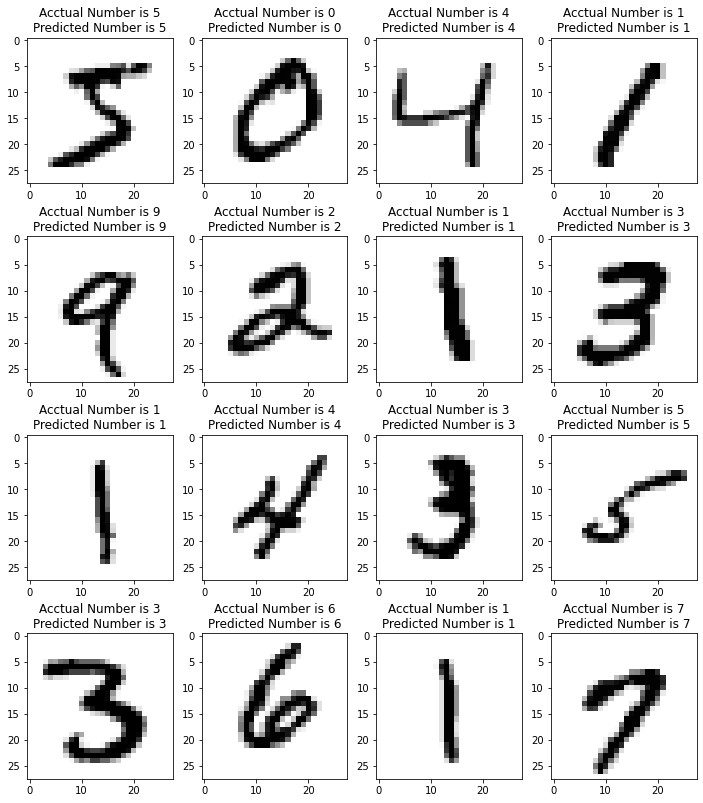

In [26]:
x_r = x.reshape(x.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_r[i], cmap='binary')
    ax.set(title = f"Acctual Number is {y[i].argmax()}\nPredicted Number is {y_pred[i].argmax()}");

- We can clearly see that all the numbers have been correctly classified by our model both from a visual perspective and also from the perspective of the actual values in y.

###### The end